캘리포니아 주택 가격 예측

In [11]:
# 필요한 라이브러리 임포트
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.datasets import fetch_california_housing

In [12]:
# 캘리포니아 주택 데이터셋 로드
housing = fetch_california_housing()

# 데이터셋을 DataFrame으로 변환
df = pd.DataFrame(housing.data, columns=housing.feature_names)
df['MedHouseVal'] = housing.target

LinearRegression

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [13]:
# 데이터 탐색 (기본 통계 보기)
print(df.describe())

             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude   MedHouseVal  
count  20640.000000  20640.000000  20640.000000  20640.000000  
mean       3.070655     35.631861   -119.569704      2.068558  
std       10.386050      2.135952      2.003532      1.153956  
min        0.692308     32.54000

In [4]:
# 독립 변수(X)와 종속 변수(y) 설정
X = df.drop('MedHouseVal', axis=1)  # 특징 데이터
y = df['MedHouseVal']  # 목표 변수 (주택 가격)

# 훈련 세트와 테스트 세트로 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
# 모델 학습: 선형 회귀 모델
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [6]:
# 예측
y_pred = model.predict(X_test)

In [7]:
# 모델 평가 (평균 제곱 오차 계산)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Root Mean Squared Error: {rmse}")

Root Mean Squared Error: 0.7455813830127761


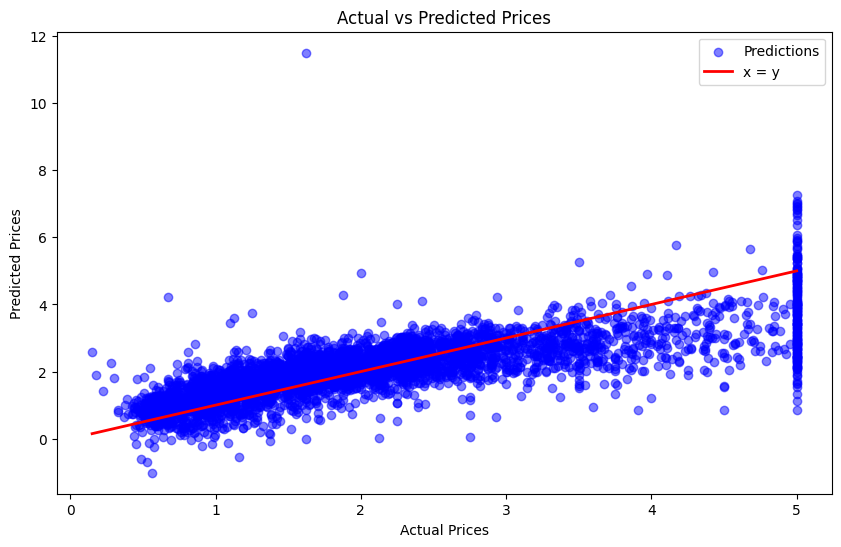

In [19]:
# 실제 값과 예측 값 비교 (시각화 - 산포도 + x = y 선)
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color="blue", label="Predictions")  # 산포도
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2, label="x = y")  # x = y 선 추가
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices")
plt.legend()
plt.show()

랜덤포레스트

Root Mean Squared Error: 0.5053399773665033


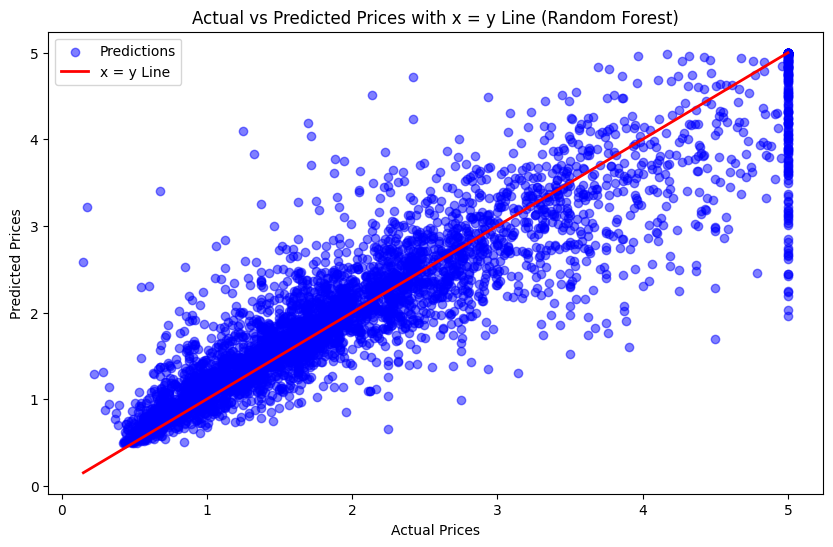

In [22]:
from sklearn.ensemble import RandomForestRegressor

# 모델 학습: 랜덤 포레스트 회귀 모델
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 예측
y_pred = model.predict(X_test)

# 모델 평가 (평균 제곱 오차 계산)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Root Mean Squared Error: {rmse}")

# 실제 값과 예측 값 비교 (시각화 - 산포도 + x = y 선)
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color="blue", label="Predictions")  # 산포도
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2, label="x = y Line")  # x = y 선 추가
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices with x = y Line (Random Forest)")
plt.legend()
plt.show()


Root Mean Squared Error: 0.5422152016168362


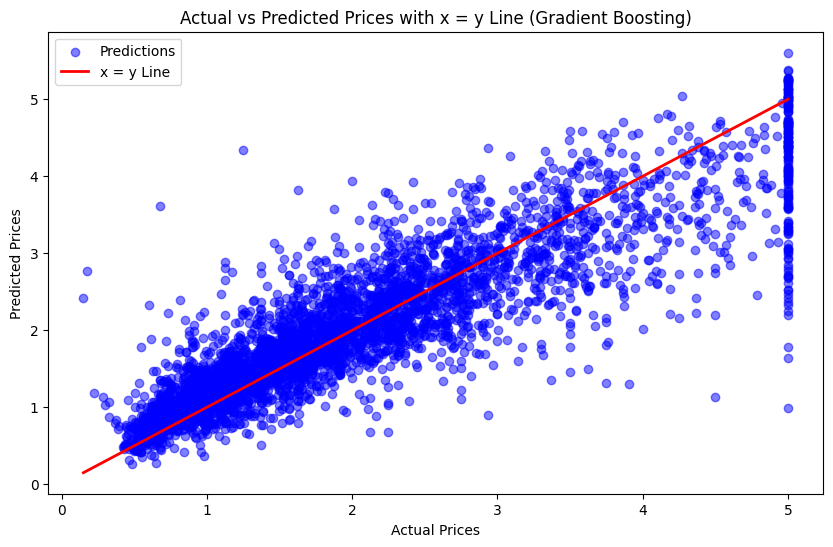

In [23]:
from sklearn.ensemble import GradientBoostingRegressor

# 모델 학습: Gradient Boosting 회귀 모델
gbr_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
gbr_model.fit(X_train, y_train)

# 예측
y_pred = gbr_model.predict(X_test)

# 모델 평가 (평균 제곱 오차 계산)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Root Mean Squared Error: {rmse}")

# 실제 값과 예측 값 비교 (시각화 - 산포도 + x = y 선)
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color="blue", label="Predictions")  # 산포도
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2, label="x = y Line")  # x = y 선 추가
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices with x = y Line (Gradient Boosting)")
plt.legend()
plt.show()

Root Mean Squared Error: 0.47672034565362764


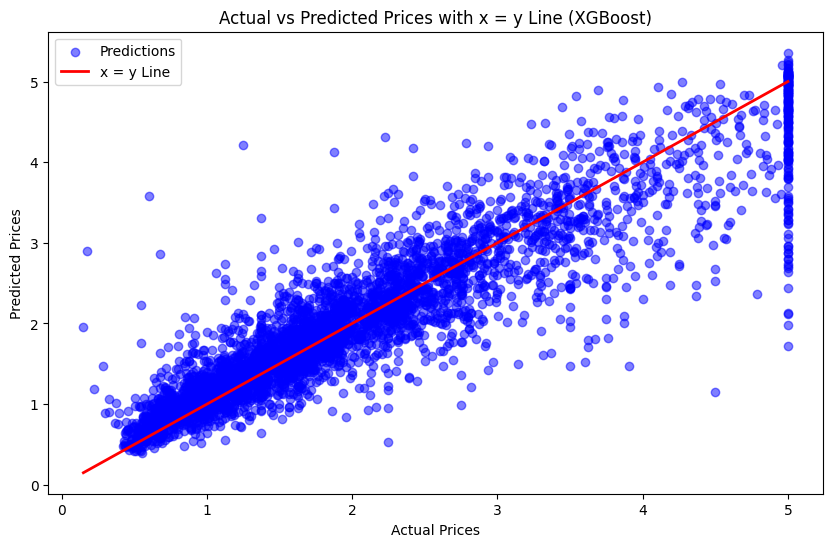

In [24]:
import xgboost as xgb

# XGBoost 회귀 모델 설정
xgbr_model = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42)

# 모델 학습
xgbr_model.fit(X_train, y_train)

# 예측
y_pred = xgbr_model.predict(X_test)

# 모델 평가 (평균 제곱 오차 계산)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Root Mean Squared Error: {rmse}")

# 실제 값과 예측 값 비교 (시각화 - 산포도 + x = y 선)
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color="blue", label="Predictions")  # 산포도
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2, label="x = y Line")  # x = y 선 추가
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices with x = y Line (XGBoost)")
plt.legend()
plt.show()